Allah

Homework 5

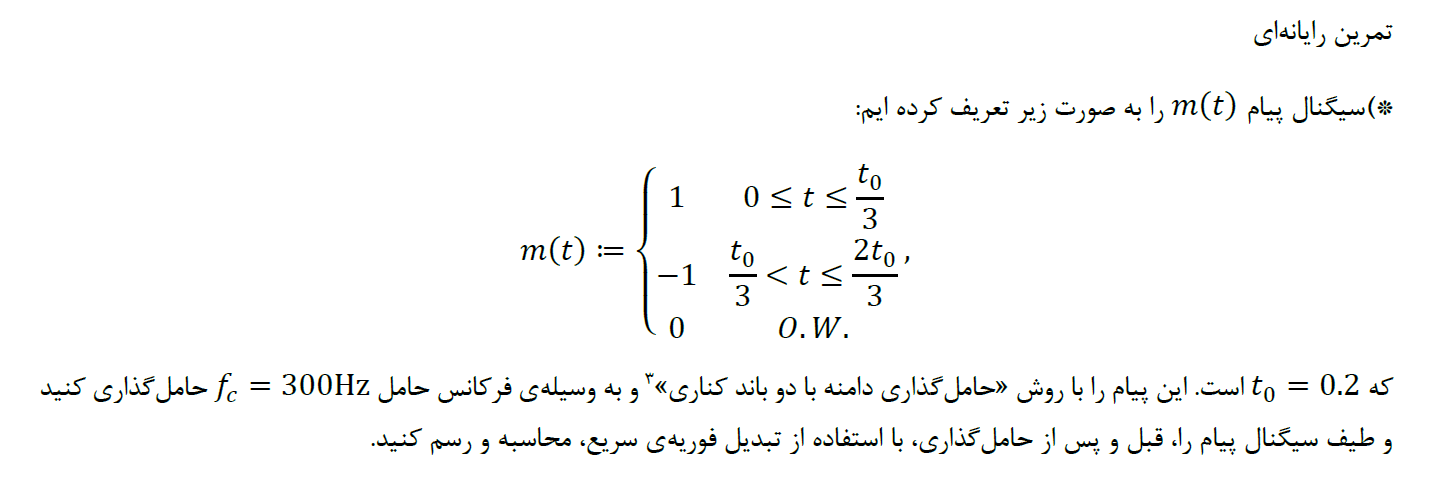

In [1]:
import numpy as np
import matplotlib.pyplot as plt

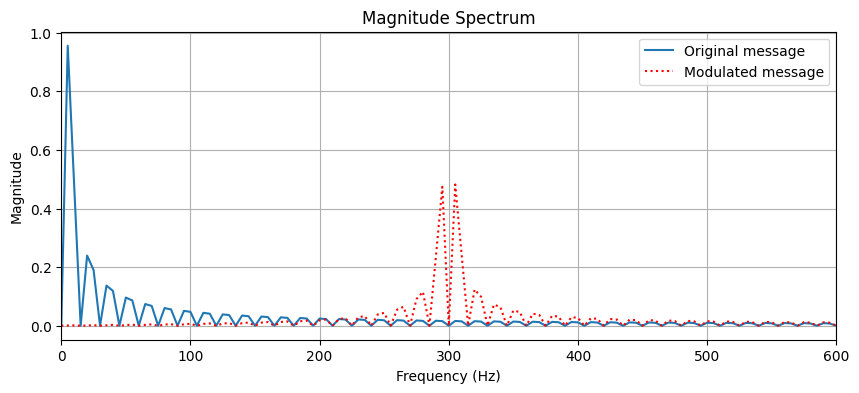

In [29]:
t_0 = 0.2 # duration in seconds
f_c = 300 # Hz
t_s = 0.0001 # sampling step
def m(t):
  if (t>= 0) and (t <= t_0 /3):
    return 1
  elif (t> t_0 /3) and (t < 2 * t_0 /3):
    return -1
  else:
    return 0

t = np.arange(0, t_0, t_s)
m_vec = np.array([m(t_val) for t_val in t])
c_vec = np.cos(2 * np.pi * f_c * t)
u_vec = m_vec * c_vec
# Perform FFT
fft_m = np.fft.fft(m_vec)
fft_m_magnitude = np.abs(fft_m)  # Get magnitude spectrum

fft_u = np.fft.fft(u_vec)
fft_u_magnitude = np.abs(fft_u)  # Get magnitude spectrum


N = len(t)
# Calculate frequency bins
frequencies = np.fft.fftfreq(N, t_s)  # Frequency bins in Hz

# Only plot the positive frequencies (since FFT is symmetric for real inputs)
positive_freq_mask = frequencies >= 0
frequencies = frequencies[positive_freq_mask]
fft_m_magnitude = fft_m_magnitude[positive_freq_mask]

# Normalize magnitude (optional)
fft_m_magnitude = fft_m_magnitude / N  # For single-sided spectrum
fft_m_magnitude[1:] *= 2  # Multiply all except DC component by 2

fft_u_magnitude = fft_u_magnitude[positive_freq_mask]
fft_u_magnitude = fft_u_magnitude / N
fft_u_magnitude[1:] *= 2

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_m_magnitude, label = 'Original message')
plt.plot(frequencies, fft_u_magnitude,'r:', label = 'Modulated message')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, 2*f_c)  # Show up to Nyquist frequency
plt.legend()
plt.show()

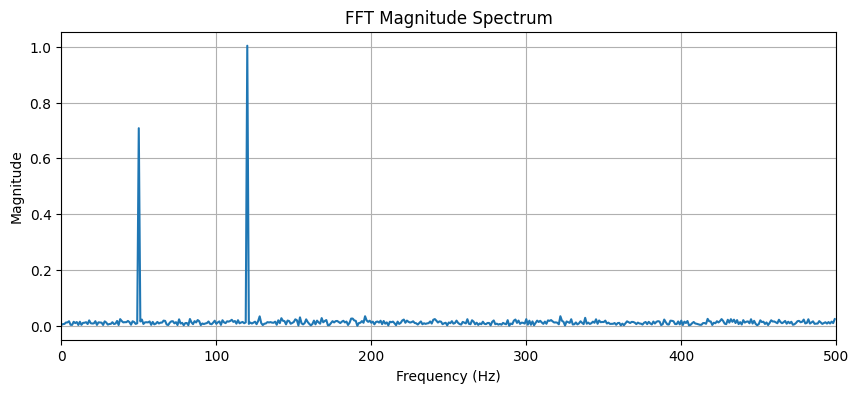

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sample parameters
sample_rate = 1000  # Sampling frequency in Hz
duration = 1.0      # Duration in seconds
N = int(sample_rate * duration)  # Number of samples

# Create a test signal: 50 Hz sine wave + 120 Hz sine wave + noise
t = np.linspace(0, duration, N, endpoint=False)
signal = 0.7 * np.sin(2 * np.pi * 50 * t) + np.sin(2 * np.pi * 120 * t)
signal += 0.2 * np.random.randn(N)  # Add some noise

# Perform FFT
fft_result = np.fft.fft(signal)
fft_magnitude = np.abs(fft_result)  # Get magnitude spectrum

# Calculate frequency bins
frequencies = np.fft.fftfreq(N, 1/sample_rate)  # Frequency bins in Hz

# Only plot the positive frequencies (since FFT is symmetric for real inputs)
positive_freq_mask = frequencies >= 0
frequencies = frequencies[positive_freq_mask]
fft_magnitude = fft_magnitude[positive_freq_mask]

# Normalize magnitude (optional)
fft_magnitude = fft_magnitude / N  # For single-sided spectrum
fft_magnitude[1:] *= 2  # Multiply all except DC component by 2

# Plot the FFT result
plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_magnitude)
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.xlim(0, sample_rate/2)  # Show up to Nyquist frequency
plt.show()